<a href="https://colab.research.google.com/github/enakai00/colab_rlbook/blob/master/Chapter03/01_Policy_Iteration_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[PI1-01]**

Import modules.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.size'] = 12

**[PI1-02]**

Define the Gridworld class.

In [0]:
class Gridworld:
  def __init__(self, size=6, traps=[], alpha=0):
    self.size = size
    self.traps = traps
    self.alpha = alpha
    self.start = (0, 0)
    self.goal = (size-1, size-1)

    self.states = [(x, y) for x in range(size) for y in range(size)]
    self.actions = [(-1, 0), (0, -1), (1, 0), (0, 1)]
    
    self.policy = {}
    for s in self.states:
      self.policy[(s, (-1, 0))] = 0
      self.policy[(s, (0, -1))] = 0
      self.policy[(s, (1, 0))] = 1/2
      self.policy[(s, (0, 1))] = 1/2

    self.value = {}
    for s in self.states:
      self.value[s] = 0
   
  def move(self, s, a):
    if s == self.goal:
      return [(1, 0, s)]  # Probability, Reward, Next state

    s_new = (s[0] + a[0], s[1] + a[1])

    if s_new not in self.states:
      # Give a penalty to a non-moving action.
      return [(1, -1, s)]  # Probability, Reward, Next state

    if s_new in self.traps:
      # Probability, Reward, Next state
      return [(self.alpha, -1, self.start), (1-self.alpha, -1, self.goal)]

    return [(1, -1, s_new)]   # Probability, Reward, Next state

**[PI1-03]**

Define a function to show state values.

In [0]:
  def show_values(world, subplot=None, title=None):
    if not subplot:
      fig = plt.figure(figsize=(world.size*0.8, world.size*0.8))
      subplot = fig.add_subplot(1, 1, 1)

    result = np.zeros([world.size, world.size])
    for (x, y) in world.states:
      if (x, y) in world.traps:
        result[y][x] = None
      else:
        result[y][x]  = world.value[(x, y)]
    sns.heatmap(result, square=True, cbar=False,
                annot=True, fmt='3.1f', cmap='coolwarm',
                ax=subplot).set_title(title)

**[PI1-04]**

Define a function to show a greedy policy.

In [0]:
def show_policy(world):
  chars = {(-1, 0): u'←', (0, -1): u'↑', (1, 0): u'→', (0, 1): u'↓'}
  result = ''
  for y in range(world.size):
    for x in range(world.size):
      if (x, y) in world.traps or (x, y) == world.goal:
        direction = u'　'
      else:
        for a in world.actions:
          if world.policy[((x, y), a)] == 1:
            direction = chars[a]
      result += direction
    result += '\n'

  print (result)

**[PI1-05]**

Define a function to apply the policy evaluation algorithm until conversion.

In [0]:
def policy_eval(world, gamma=1, delta=0.01):
  while(True):
    delta_max = 0
    for s in world.states:
      v_new = 0
      for a in world.actions:
        results = world.move(s, a)
        for p, r, s_new in results:
          v_new += world.policy[(s, a)] * p * (r + gamma * world.value[s_new])
      delta_max = max(delta_max, abs(world.value[s] - v_new))
      world.value[s] = v_new

    if delta_max < delta:
      break

**[PI1-06]**

Define a function to apply the policy update algorithm.

In [0]:
def policy_update(world, gamma=1):
  update = False
  for s in world.states:
    q_max = -10**10
    a_best = None
    for a in world.actions:
      results = world.move(s, a)
      q = 0
      for p, r, s_new in results:
        q += p * (r + gamma * world.value[s_new])
      if q > q_max:
        q_max = q
        a_best = a

    if world.policy[(s, a_best)] != 1:
      update = True
    for a in world.actions:
      world.policy[(s, a)] = 0
    world.policy[(s, a_best)] = 1
  
  return update

**[PI1-07]**

Define a function to apply the policy iteration algorithm.

In [0]:
def policy_iteration(world):
  while True:
    print('.', end='')
    policy_eval(world)
    if not policy_update(world):
      print('\n')
      break

**[PI1-06]**

Define a function to apply the policy update algorithm (α=0.5).

....

→→→→　↓
→→→→　↓
→→→↓　↓
→→→↓　↓
→→→→→↓
→→→→→　



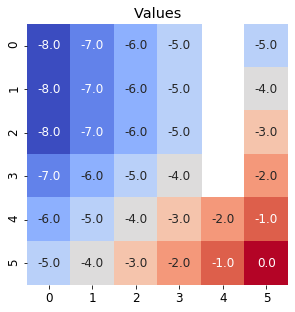

In [8]:
world = Gridworld(size=6, traps=[(4, y) for y in range(4)], alpha=0.5)
policy_iteration(world)
show_policy(world)
show_values(world, title='Values')

**[PI1-07]**

Define a function to apply the policy update algorithm (α=0.45).

...

→→→→　←
→→→→　↓
→→→→　↓
→→→↓　↓
→→→→→↓
→→→→→　



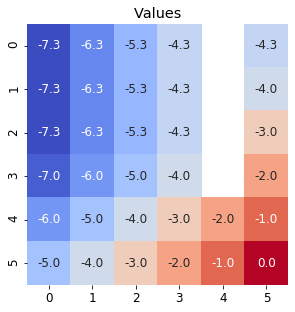

In [9]:
world = Gridworld(size=6, traps=[(4, y) for y in range(4)], alpha=0.45)
policy_iteration(world)
show_policy(world)
show_values(world, title='Values')

**[PI1-08]**

Define a function to apply the policy update algorithm (α=1.0).

....

→→→↓　↓
→→→↓　↓
→→→↓　↓
→→→↓　↓
→→→→→↓
→→→→→　



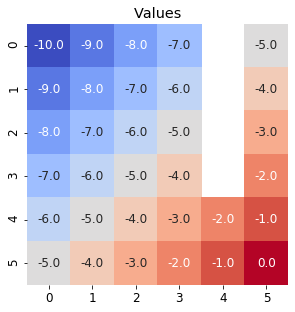

In [10]:
world = Gridworld(size=6, traps=[(4, y) for y in range(4)], alpha=1.0)
policy_iteration(world)
show_policy(world)
show_values(world, title='Values')

**[PI1-09]**

Define a function to apply the policy update algorithm (α=0.0).

...

→→→→　←
→→→→　←
→→→→　←
→→→→　←
↑↑↑↑↑↓
→→→→→　



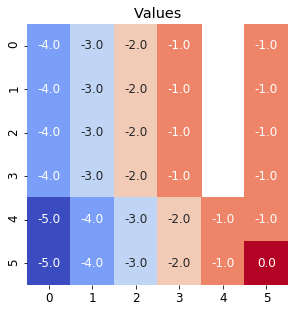

In [11]:
world = Gridworld(size=6, traps=[(4, y) for y in range(4)], alpha=0.0)
policy_iteration(world)
show_policy(world)
show_values(world, title='Values')